## Import All Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Read Csv File

In [2]:
d1 = pd.read_csv('data\\German-Credit\\German_Credit_data.csv')


###  Make a copy of csv File

In [3]:
df = d1.copy()

In [4]:
df.shape

(1000, 21)

### Rename features

In [5]:
df.rename(columns={'Creditability':'creditability','Status_of_existing_account':'saccount','Duration_of_Credit_month':'dcreditmon',
                   'Payment_Status_of_Previous_Credit(Credit_history)':'chistory','Purpose_of_loan':'ploan',
                  'Credit_Amount':'camt','Value_of_Savings_account&bonds':'valueofsact',
                  'Years_of_Present_Employment':'experience','Percentage_of_disposable_income':'percentinhandsalary',
                  'Sex_&_Marital_Status':'genderandmarital','Guarantors/Debtors':'nominee',
                  'Duration_in_Present_Residence':'yearofleving',
                  'Property':'property','Age_in_years':'age','Concurrent_Credits':'totalcredit',
                  'Housing':'house','No_of_Credits_at_this__Bank':'currentbankcredit','Occupation':'occupation',
                  'No_of_dependents':'dependents','Telephone':'telephone','Foreign_Worker':'foreignworker',
                  },inplace=True)

###  See All Unique Values from Dataset.

In [6]:
for i in df.columns:
    print(df[i].unique(),i)
    print('--------')

[1 0] creditability
--------
[1 2 4 3] saccount
--------
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40] dcreditmon
--------
[4 2 3 0 1] chistory
--------
[ 2  0  9  3  1 10  5  4  6  8] ploan
--------
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366   763  3976  6260  1919  2603   936  3062
  4795  5842  

###  Value Count of features Unique value.

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('--------')

1    700
0    300
Name: creditability, dtype: int64
--------
4    394
1    274
2    269
3     63
Name: saccount, dtype: int64
--------
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: dcreditmon, dtype: int64
--------
2    530
4    293
3     88
1     49
0     40
Name: chistory, dtype: int64
--------
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: ploan, dtype: int64
--------
1262    3
1258    3
1478    3
1275    3
1393    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: camt, Length: 923, dtype: int64
--------
1    603
5    183
2    103
3     63
4     48
Name: valueofsact, dtype: int64
--------
3    339
5    253
4    174
2    17

### All EDA Are Done in Logistic Regression, From Logistic Regression We can say there are no required Feature Engineering For this Data

## Train-Test Split & Model Building

In [8]:
X = df.loc[:,'saccount':]
y = df.loc[:,'creditability']

In [9]:
print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


### Shuffle The Data

In [16]:
X.sample(frac=1)
y.sample(frac=1)

825    0
963    0
359    1
326    1
401    1
      ..
597    1
757    0
182    1
640    1
556    1
Name: creditability, Length: 1000, dtype: int64

### Import All Required Library for Model Building

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [18]:
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.7)

In [19]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(700, 20)
(700,)
(300, 20)
(300,)


###  Model Building

In [20]:
m1 = DecisionTreeClassifier(criterion='gini').fit(train_X,train_y)

In [21]:
p1=m1.predict(test_X)


In [22]:
p1 = pd.Series(p1)

In [23]:
print(test_y.value_counts())

1    209
0     91
Name: creditability, dtype: int64


In [24]:
print(p1.value_counts())

1    216
0     84
dtype: int64


In [25]:
print(confusion_matrix(test_y,p1))

[[ 42  49]
 [ 42 167]]


In [26]:
print(classification_report(test_y,p1))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        91
           1       0.77      0.80      0.79       209

    accuracy                           0.70       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.69      0.70      0.69       300



## Hyperparameter Tunning and Model Building

In [47]:
m2 = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=9,min_samples_split=6,max_features=13,ccp_alpha=0.001).fit(train_X,train_y)

In [48]:
p2 = m2.predict(test_X)
p2 = pd.Series(p2)

In [49]:
print(test_y.value_counts())

1    209
0     91
Name: creditability, dtype: int64


In [50]:
print(p2.value_counts())

1    205
0     95
dtype: int64


### confusion matrix and classfication report

In [51]:
#hyperparameter model matrix
print(confusion_matrix(test_y,p2))

[[ 46  45]
 [ 49 160]]


In [52]:
#hyperparameter model report
print(classification_report(test_y,p2))

              precision    recall  f1-score   support

           0       0.48      0.51      0.49        91
           1       0.78      0.77      0.77       209

    accuracy                           0.69       300
   macro avg       0.63      0.64      0.63       300
weighted avg       0.69      0.69      0.69       300



## HyperParameter tuning Usinng GridSearch CV

In [53]:
param = {
    
    'criterion': ['gini','entropy'],
    'max_depth' : np.arange(1,15,2),
    'max_leaf_nodes' : np.arange(0,14,1),
    'min_samples_split' : np.arange(1,15,2),
    'max_features' : np.arange(5,15),
    'ccp_alpha' : np.arange(0,0.01,0.001)
    
    
    
}

In [55]:
gdcv = GridSearchCV(DecisionTreeClassifier(),param_grid=param,scoring='accuracy',cv=3,verbose=3,n_jobs=7)

In [56]:
grid=gdcv.fit(train_X,train_y)

Fitting 3 folds for each of 137200 candidates, totalling 411600 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    5.2s
[Parallel(n_jobs=7)]: Done 429 tasks      | elapsed:    7.4s
[Parallel(n_jobs=7)]: Done 1709 tasks      | elapsed:   12.7s
[Parallel(n_jobs=7)]: Done 3501 tasks      | elapsed:   17.1s
[Parallel(n_jobs=7)]: Done 5805 tasks      | elapsed:   23.0s
[Parallel(n_jobs=7)]: Done 8621 tasks      | elapsed:   30.0s
[Parallel(n_jobs=7)]: Done 11949 tasks      | elapsed:   38.5s
[Parallel(n_jobs=7)]: Done 15789 tasks      | elapsed:   48.0s
[Parallel(n_jobs=7)]: Done 20141 tasks      | elapsed:   59.5s
[Parallel(n_jobs=7)]: Done 25005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=7)]: Done 30381 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 36269 tasks      | elapsed:  1.7min
[Parallel(n_jobs=7)]: Done 42669 tasks      | elapsed:  1.9min
[Parallel(n_jobs=7)]: Done 49581 tasks      | elapsed:  2.2min
[Parallel(n_jobs=7)]: Done 57005 tasks      | elaps

In [57]:
best_param=grid.best_params_

In [58]:
best_param

{'ccp_alpha': 0.004,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 14,
 'max_leaf_nodes': 12,
 'min_samples_split': 9}

## Model Building and Prediction Of GridSearchCV.

In [512]:
m3=DecisionTreeClassifier(ccp_alpha= 0.0001,
 criterion= 'gini',
 max_depth= 13,
 max_features= 15,
 max_leaf_nodes= 14,
 class_weight={0:2}
                          
                          
).fit(train_X,train_y)

In [513]:
p3 = m3.predict(test_X)

In [514]:
p3 = pd.Series(p3)

In [515]:
test_y.value_counts()

1    209
0     91
Name: creditability, dtype: int64

In [516]:
p3.value_counts()

1    201
0     99
dtype: int64

In [517]:
confusion_matrix(test_y,p3)

array([[ 48,  43],
       [ 51, 158]], dtype=int64)

In [518]:
print(classification_report(test_y,p3))

              precision    recall  f1-score   support

           0       0.48      0.53      0.51        91
           1       0.79      0.76      0.77       209

    accuracy                           0.69       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.69      0.69      0.69       300



# Feature Selection

## RFE

In [519]:
features = list(df.columns)


In [520]:
features.remove('creditability')

In [533]:
rfe = RFE(DecisionTreeClassifier(),9).fit(train_X,train_y)

C:\Users\fenil\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [534]:
support = rfe.support_
ranking = rfe.ranking_

In [535]:
df_feature = pd.DataFrame({'Features':features,'Support':support,'Ranking':ranking})

In [536]:
df_feature=df_feature.sort_values(by='Ranking')

In [537]:
df_feature

,Features,Support,Ranking
0,saccount,True,1
1,dcreditmon,True,1
2,chistory,True,1
4,camt,True,1
5,valueofsact,True,1
6,experience,True,1
12,age,True,1
8,genderandmarital,True,1
11,property,True,1
3,ploan,False,2


In [538]:
filt = df_feature['Ranking']==1

In [539]:
rfe_feature=df_feature[filt]['Features'].to_list()

In [540]:
df[rfe_feature]

,saccount,dcreditmon,chistory,camt,valueofsact,experience,age,genderandmarital,property
0,1,18,4,1049,1,2,21,2,2
1,1,9,4,2799,1,3,36,3,1
2,2,12,2,841,2,4,23,2,1
3,1,12,4,2122,1,3,39,3,1
4,1,12,4,2171,1,3,38,3,2
...,...,...,...,...,...,...,...,...,...
995,1,24,2,1987,1,3,21,3,1
996,1,24,2,2303,1,5,45,3,1
997,4,21,4,12680,5,5,30,3,4
998,2,12,2,6468,5,1,52,3,4


## Build model & Hyperparameter tuning after Feature Selection 

In [541]:
f_X = df[rfe_feature]
f_y = df.loc[:,'creditability']

In [542]:
print(f_X.shape)
print(f_y.shape)

(1000, 9)
(1000,)


In [543]:
train_f_X,test_f_X,train_f_y,test_f_y = train_test_split(f_X,f_y,test_size=0.3)

In [544]:
print(train_f_X.shape)
print(train_f_y.shape)
print(test_f_X.shape)
print(test_f_y.shape)

(700, 9)
(700,)
(300, 9)
(300,)


In [545]:
m4 = DecisionTreeClassifier().fit(train_f_X,train_f_y)

In [546]:
p4  = m4.predict(test_f_X)
p4 = pd.Series(p3)

In [547]:
print(p4.value_counts())

1    201
0     99
dtype: int64


In [548]:
print(test_f_y.value_counts())

1    207
0     93
Name: creditability, dtype: int64


In [549]:
#After F.S hyper.(without) model
print(confusion_matrix(test_f_y,p4))

[[ 28  65]
 [ 71 136]]


In [550]:
#After F.S hyper.(without) model
print(classification_report(test_f_y,p4))

              precision    recall  f1-score   support

           0       0.28      0.30      0.29        93
           1       0.68      0.66      0.67       207

    accuracy                           0.55       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.55      0.55      0.55       300



##  Hyperparameter Tunning Using GridSearchCV

In [551]:
grid_fs=gdcv.fit(train_f_X,train_f_y)

Fitting 3 folds for each of 137200 candidates, totalling 411600 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    5.1s
[Parallel(n_jobs=7)]: Done 613 tasks      | elapsed:    6.9s
[Parallel(n_jobs=7)]: Done 3173 tasks      | elapsed:   12.6s
[Parallel(n_jobs=7)]: Done 6757 tasks      | elapsed:   21.0s
[Parallel(n_jobs=7)]: Done 10719 tasks      | elapsed:  6.6min
[Parallel(n_jobs=7)]: Done 15919 tasks      | elapsed:  6.9min
[Parallel(n_jobs=7)]: Done 22575 tasks      | elapsed:  7.1min
[Parallel(n_jobs=7)]: Done 30255 tasks      | elapsed:  7.4min
[Parallel(n_jobs=7)]: Done 38959 tasks      | elapsed:  7.8min
[Parallel(n_jobs=7)]: Done 48687 tasks      | elapsed:  8.1min
[Parallel(n_jobs=7)]: Done 59439 tasks      | elapsed:  8.6min
[Parallel(n_jobs=7)]: Done 71215 tasks      | elapsed:  9.0min
[Parallel(n_jobs=7)]: Done 84015 tasks      | elapsed:  9.5min
[Parallel(n_jobs=7)]: Done 97839 tasks      | elapsed: 10.0min
[Parallel(n_jobs=7)]: Done 112687 tasks      | el

In [552]:
grid_fs.best_params_

{'ccp_alpha': 0.005,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 6,
 'max_leaf_nodes': 11,
 'min_samples_split': 7}

In [657]:
m5 = DecisionTreeClassifier(ccp_alpha= 0.005,
 criterion= 'gini',
 max_depth= 9,
 max_features= 6,
 max_leaf_nodes= 11,
 min_samples_split= 7,class_weight={0:1.7}).fit(train_f_X,train_f_y)

In [658]:
p5 = m5.predict(test_f_X)

In [659]:
p5= pd.Series(p5)

In [660]:
test_f_y.value_counts()

1    207
0     93
Name: creditability, dtype: int64

In [661]:
p5.value_counts()

1    197
0    103
dtype: int64

In [662]:
confusion_matrix(test_f_y,p5)

array([[ 54,  39],
       [ 49, 158]], dtype=int64)

In [663]:
print(classification_report(test_f_y,p5))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55        93
           1       0.80      0.76      0.78       207

    accuracy                           0.71       300
   macro avg       0.66      0.67      0.67       300
weighted avg       0.72      0.71      0.71       300



## Comparizone of All Models we Build So Far

>> ***Base Model*** 

In [664]:
test_y.value_counts()

1    209
0     91
Name: creditability, dtype: int64

In [665]:
p1.value_counts()

1    216
0     84
dtype: int64

In [666]:
confusion_matrix(test_y,p1)

array([[ 42,  49],
       [ 42, 167]], dtype=int64)

In [667]:
print(classification_report(test_y,p1))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        91
           1       0.77      0.80      0.79       209

    accuracy                           0.70       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.69      0.70      0.69       300



>> **Model With Manual HyperParameter**

In [668]:
test_y.value_counts()

1    209
0     91
Name: creditability, dtype: int64

In [669]:
p2.value_counts()

1    205
0     95
dtype: int64

In [670]:
confusion_matrix(test_y,p2)

array([[ 46,  45],
       [ 49, 160]], dtype=int64)

In [671]:
print(classification_report(test_y,p2))

              precision    recall  f1-score   support

           0       0.48      0.51      0.49        91
           1       0.78      0.77      0.77       209

    accuracy                           0.69       300
   macro avg       0.63      0.64      0.63       300
weighted avg       0.69      0.69      0.69       300



>>  **Model With GridSearchCV**

In [672]:
test_y.value_counts()

1    209
0     91
Name: creditability, dtype: int64

In [673]:
p3.value_counts()

1    201
0     99
dtype: int64

In [674]:
confusion_matrix(test_y,p3)

array([[ 48,  43],
       [ 51, 158]], dtype=int64)

In [675]:
print(classification_report(test_y,p3))

              precision    recall  f1-score   support

           0       0.48      0.53      0.51        91
           1       0.79      0.76      0.77       209

    accuracy                           0.69       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.69      0.69      0.69       300



>> **Base Model After Feature Selection**

In [676]:
test_y.value_counts()

1    209
0     91
Name: creditability, dtype: int64

In [677]:
p4.value_counts()

1    201
0     99
dtype: int64

In [678]:
confusion_matrix(test_f_y,p4)

array([[ 28,  65],
       [ 71, 136]], dtype=int64)

In [679]:
print(classification_report(test_f_y,p4))

              precision    recall  f1-score   support

           0       0.28      0.30      0.29        93
           1       0.68      0.66      0.67       207

    accuracy                           0.55       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.55      0.55      0.55       300



>> **GridSearchCV After Feature Selection**

In [680]:
test_y.value_counts()

1    209
0     91
Name: creditability, dtype: int64

In [681]:
p5.value_counts()

1    197
0    103
dtype: int64

In [682]:
confusion_matrix(test_f_y,p5)

array([[ 54,  39],
       [ 49, 158]], dtype=int64)

In [683]:
print(classification_report(test_f_y,p5))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55        93
           1       0.80      0.76      0.78       207

    accuracy                           0.71       300
   macro avg       0.66      0.67      0.67       300
weighted avg       0.72      0.71      0.71       300



>> **After All Of Above Comparizone, Concluded that Last Model Which Is Feature Selected and tuned Using GridSearchCV It Is Best**

## Visualize the tree 

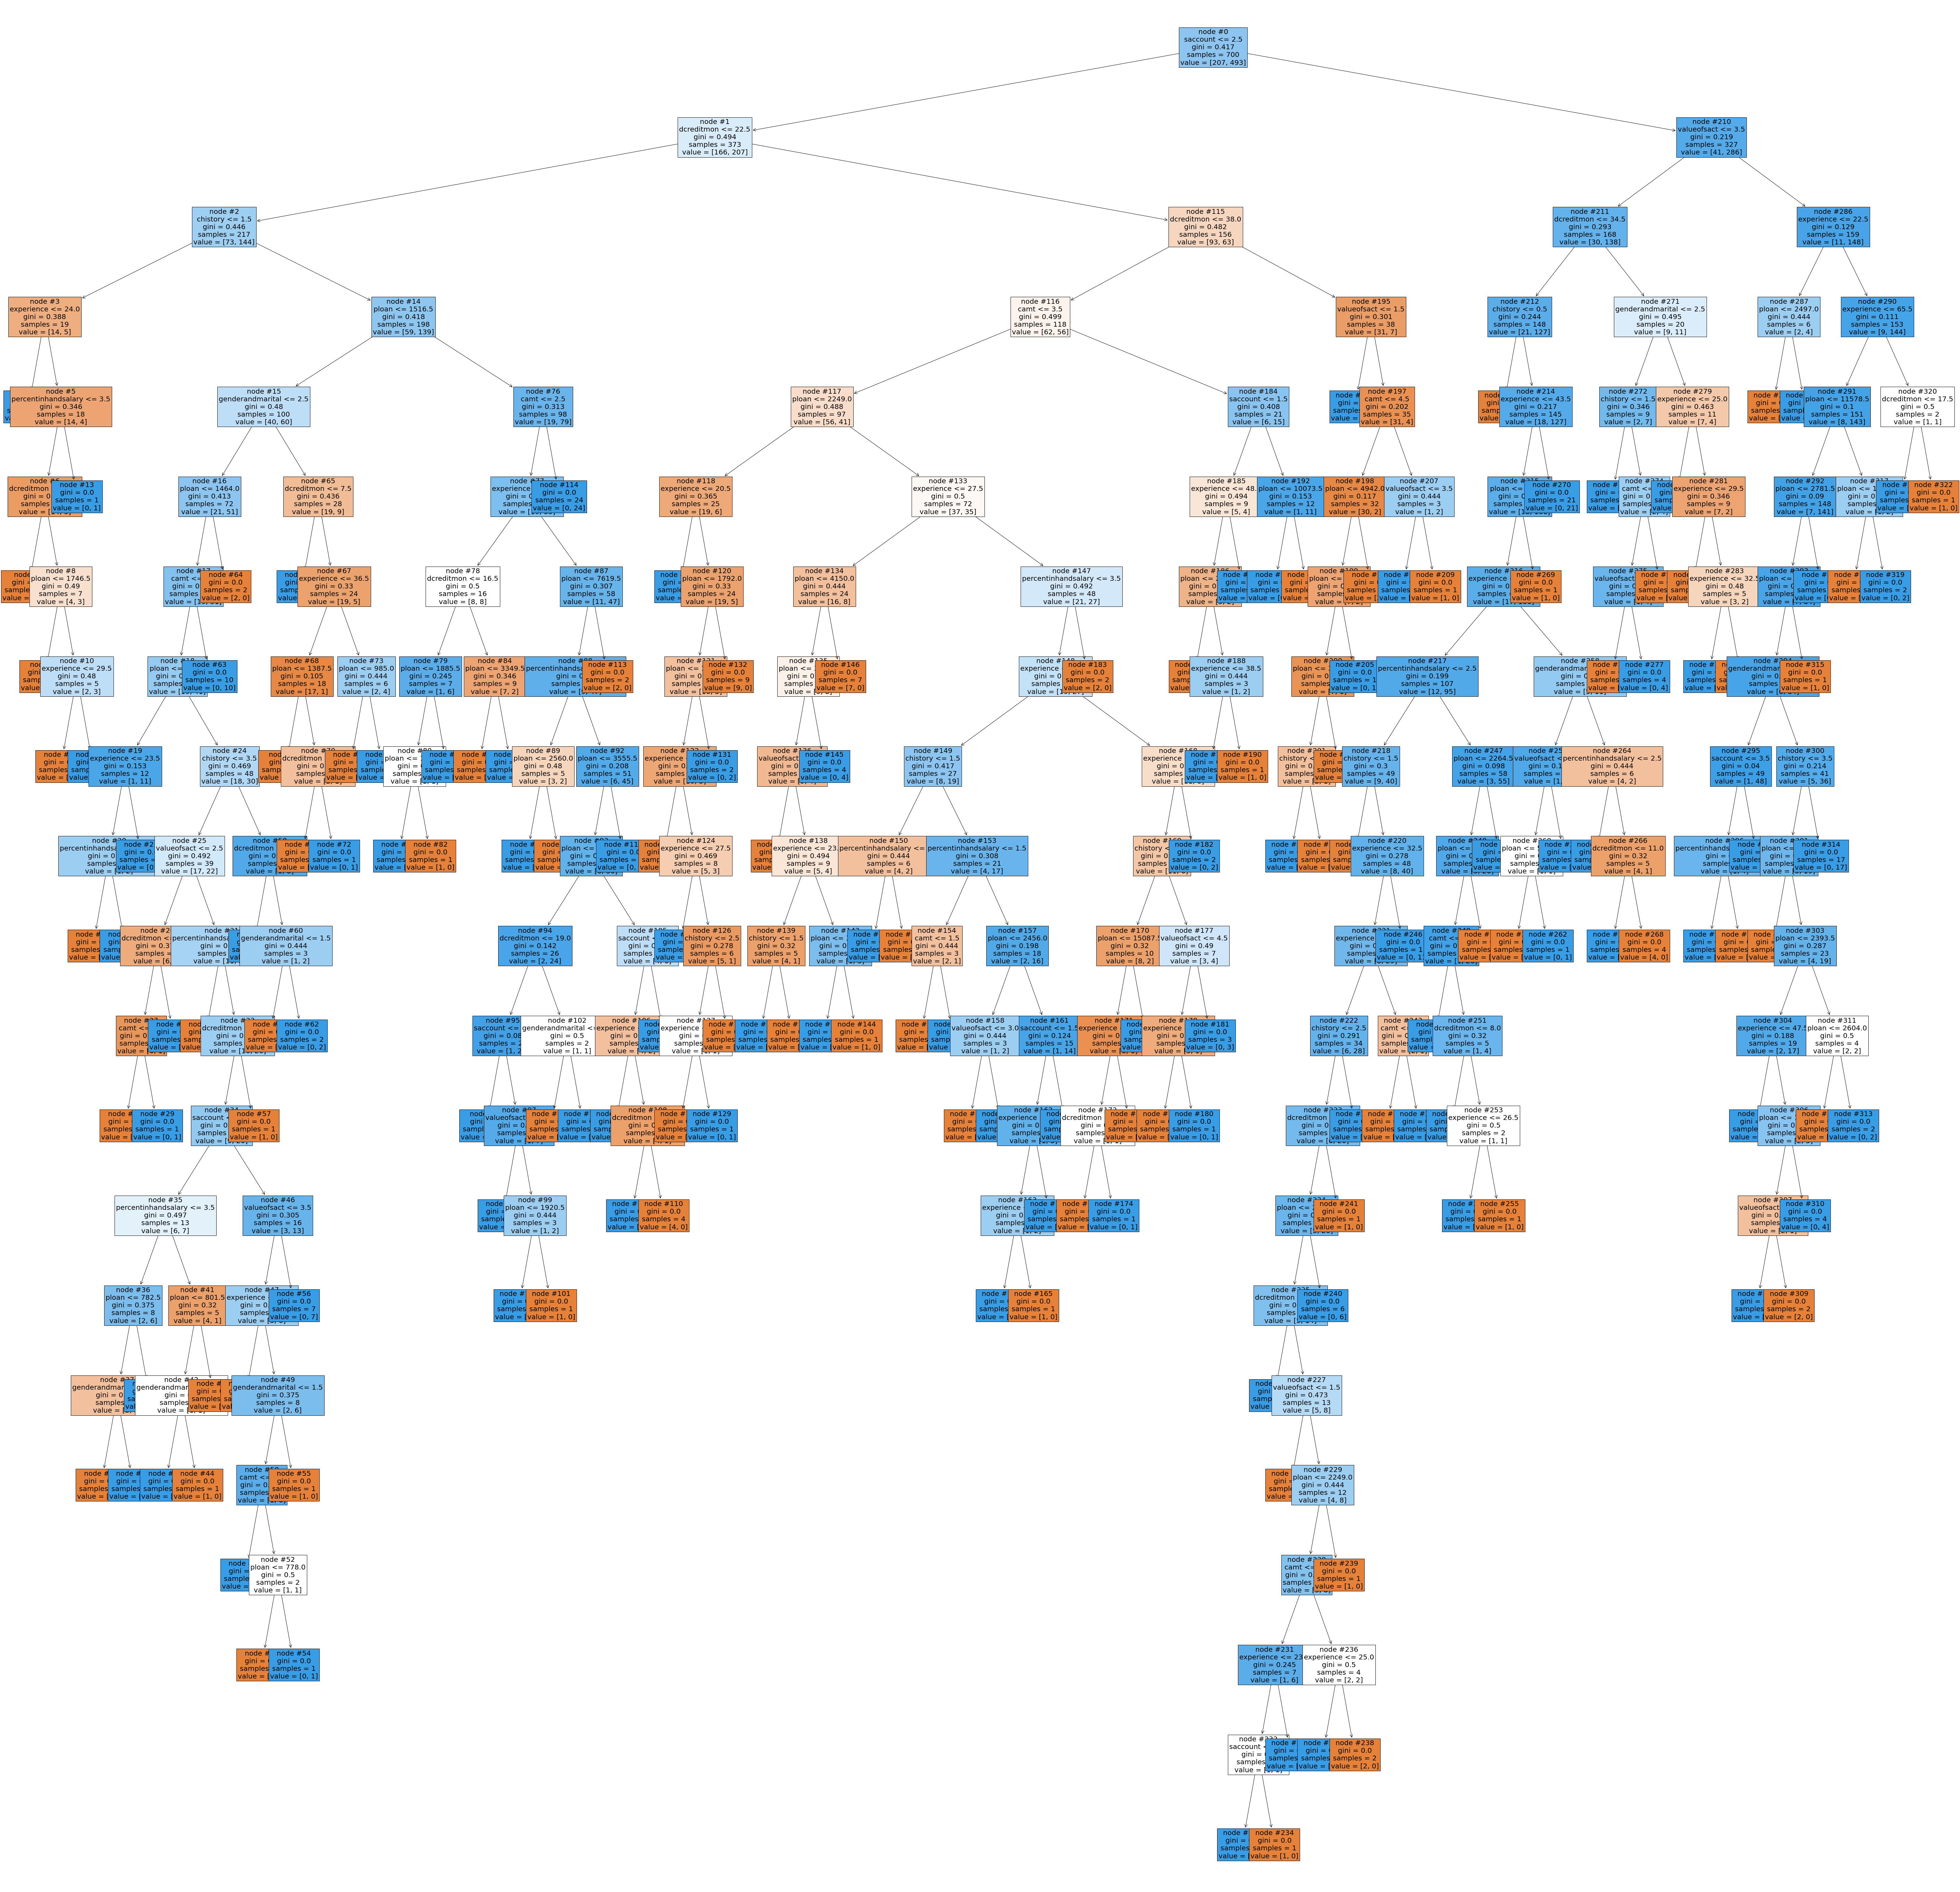

In [684]:
plt.figure(figsize=(100,100))

tree.plot_tree(m4,filled=True,feature_names=features,fontsize=20,node_ids=True)

plt.show()

## Export Model For End 2 End Project

In [685]:
import pickle

In [686]:
filename = 'decision.pkl'

In [687]:
pickle.dump(m5,open(filename,'wb'))

### Verify Model By Reading and Predicting 

In [689]:
model=pickle.load(open(filename,'rb'))

In [697]:
pred=model.predict(test_f_X)

In [701]:
pred=pd.Series(pred)

In [702]:
test_f_y.value_counts()

1    207
0     93
Name: creditability, dtype: int64

In [703]:
pred.value_counts()

1    197
0    103
dtype: int64